##HW2 - Data Exploration and Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pylab

params = {'xtick.labelsize': 18,
          'ytick.labelsize': 18,
          'axes.titlesize' : 22,
          'axes.labelsize' : 20,
          'legend.fontsize': 18,
          'legend.title_fontsize': 22,
          'figure.titlesize': 24 }
pylab.rcParams.update(params)

## Data Loading

In [2]:
#loading preprocessed training_dataset ("PreparedTrainingSet.csv") from previous major HW1
!rm *.csv

from google.colab import files
print("Please load PreparedTrainingSet.csv")
uploadedData = files.upload()
filename = list(uploadedData)[0]
training_dataset = pd.read_csv(filename)

print("Please load PreparedTestSet.csv")
uploadedData = files.upload()
filename = list(uploadedData)[0]
test_dataset = pd.read_csv(filename)


rm: cannot remove '*.csv': No such file or directory
Please load PreparedTrainingSet.csv


Saving PreparedTrainingSet.csv to PreparedTrainingSet.csv
Please load PreparedTestSet.csv


Saving PreparedTestSet.csv to PreparedTestSet.csv


In [3]:
training_dataset.shape
training_dataset.info()

test_dataset.shape
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             1000 non-null   int64  
 1   age                    1000 non-null   int64  
 2   sex                    1000 non-null   object 
 3   weight                 1000 non-null   float64
 4   current_location       1000 non-null   object 
 5   num_of_siblings        1000 non-null   int64  
 6   happiness_score        1000 non-null   int64  
 7   household_income       1000 non-null   float64
 8   conversations_per_day  1000 non-null   int64  
 9   sugar_levels           1000 non-null   int64  
 10  sport_activity         1000 non-null   int64  
 11  pcr_date               1000 non-null   object 
 12  PCR_01                 1000 non-null   float64
 13  PCR_02                 1000 non-null   float64
 14  PCR_03                 1000 non-null   float64
 15  PCR_0

##Q1

In [4]:

def visualize_clf(clf, X, Y, title,
                  xlabel, ylabel,
                  marker_size=50,
                  grid_length=300,
                  linewidths=None):
    import matplotlib.pyplot as plt
    import pandas as pd
    from matplotlib.colors import ListedColormap

    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()

    # For internal use here, make sure labels are 0 and 1
    Y = np.ravel(Y).astype(int)
    labels = set(Y)
    assert len(labels) == 2, "Can only visualize two unique labels"

    if labels == set([-1,1]):
      Y = (Y + 1) // 2
      labels = set(Y)

    assert labels == set([0,1]), "Could not handle given labels"

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["D", "o"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(labels, palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size,
                    linewidths=linewidths)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


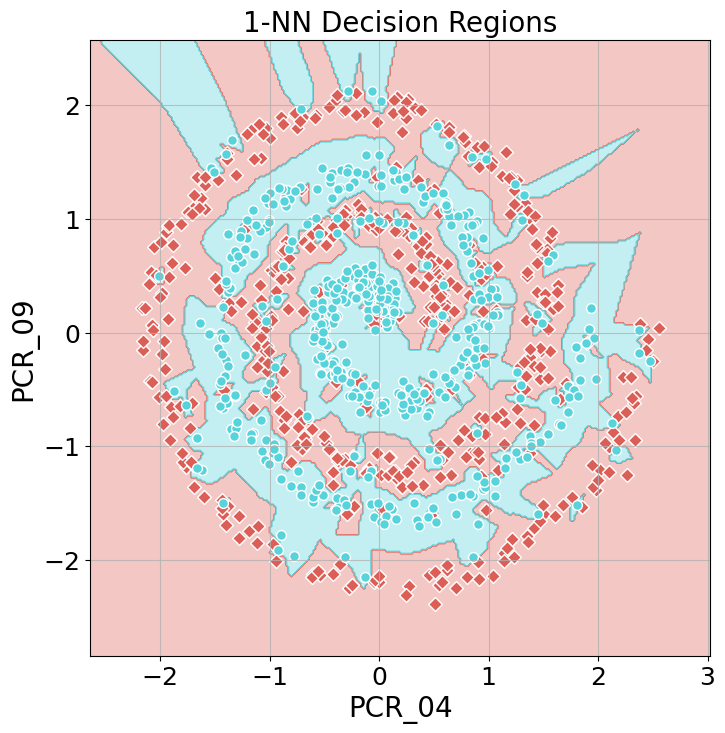

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import sys

features = ['PCR_04', 'PCR_09']
# Create a training DataFrame with selected features and labels
X_train = pd.DataFrame(data=training_dataset[features])
Y_train = training_dataset['spread']

# Train a 1-NN model on the subset
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, Y_train)

# Visualize the decision regions using the provided function
visualize_clf(knn_model, X_train, Y_train, "1-NN Decision Regions", features[0], features[1])

##Q2

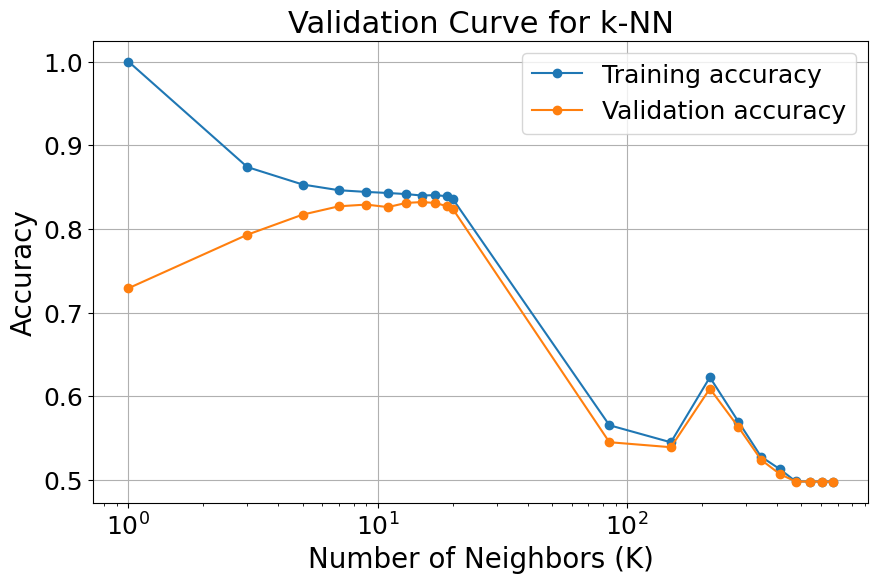

In [6]:
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import numpy as np

#performing 8-fold cross validation on the k-NN model for k ∈ k_values. Ploting the Training and Validation accuracies for each k
k_values = list(range(1, 20, 2)) + list(range(20, 695, 65))

train_scores = []
validation_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_results = cross_validate(knn, X_train, Y_train, cv=8, return_train_score=True)
    train_scores.append(np.mean(cv_results['train_score']))
    validation_scores.append(np.mean(cv_results['test_score']))

train_scores = np.array(train_scores)
validation_scores = np.array(validation_scores)

plt.figure(figsize=(10, 6))
plt.semilogx(k_values, train_scores, label='Training accuracy', marker='o')
plt.semilogx(k_values, validation_scores, label='Validation accuracy', marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('Validation Curve for k-NN')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
best_k_index = np.argmax(validation_scores)
best_k = k_values[best_k_index]
best_k_train_score = train_scores[best_k_index]
best_k_validation_score = validation_scores[best_k_index]

print(f"Best K: {best_k}")
print(f"Average training accuracy for best K: {best_k_train_score:.4f}")
print(f"Average validation accuracy for best K: {best_k_validation_score:.4f}")

overfitting_ks = [k for i, k in enumerate(k_values) if train_scores[i] > best_k_train_score]
underfitting_ks = [k for i, k in enumerate(k_values) if train_scores[i] < best_k_train_score]

print(f"K values causing overfitting: {overfitting_ks}")
print(f"K values causing underfitting: {underfitting_ks}")

Best K: 15
Average training accuracy for best K: 0.8399
Average validation accuracy for best K: 0.8320
K values causing overfitting: [1, 3, 5, 7, 9, 11, 13, 17]
K values causing underfitting: [19, 20, 85, 150, 215, 280, 345, 410, 475, 540, 605, 670]


##Q3


Training Accuracy: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


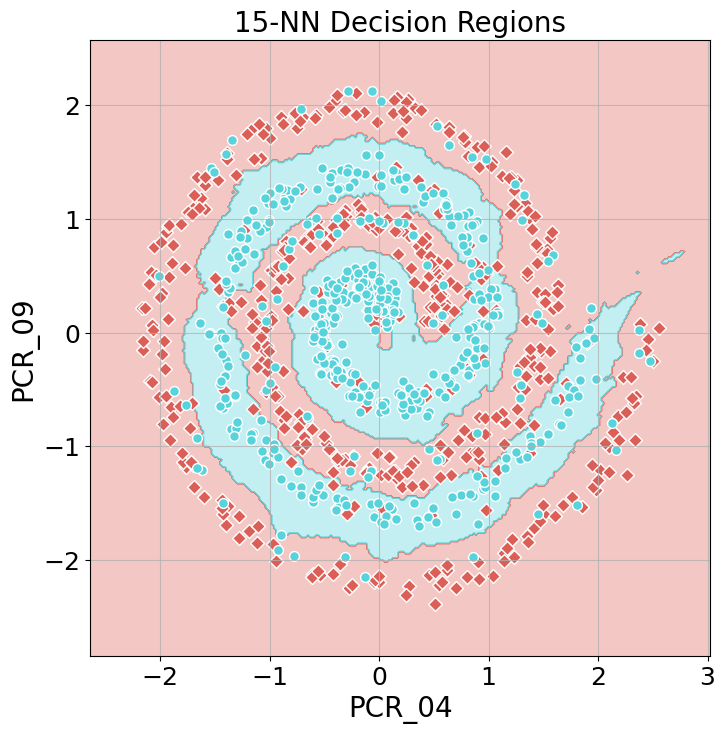

Test Accuracy: 0.82


In [8]:
# Train a 15-NN model on the subset
knn_model = KNeighborsClassifier(n_neighbors=15)
knn_model.fit(X_train, Y_train)

# Compute training accuracy
train_accuracy = knn_model.score(X_train, Y_train)
print(f"Training Accuracy: {train_accuracy:.2f}")


# Create a testing DataFrame with selected features and labels
X_test = pd.DataFrame(data=test_dataset[features])
Y_test = test_dataset['spread']

# test the 15-NN model on the subset
knn_model.predict(X_test)

# Visualize the decision regions using the provided function
visualize_clf(knn_model, X_train, Y_train, "15-NN Decision Regions", features[0], features[1])

# Compute test accuracy
test_accuracy = knn_model.score(X_test, Y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

##Q5

Training accuracy: 0.6950


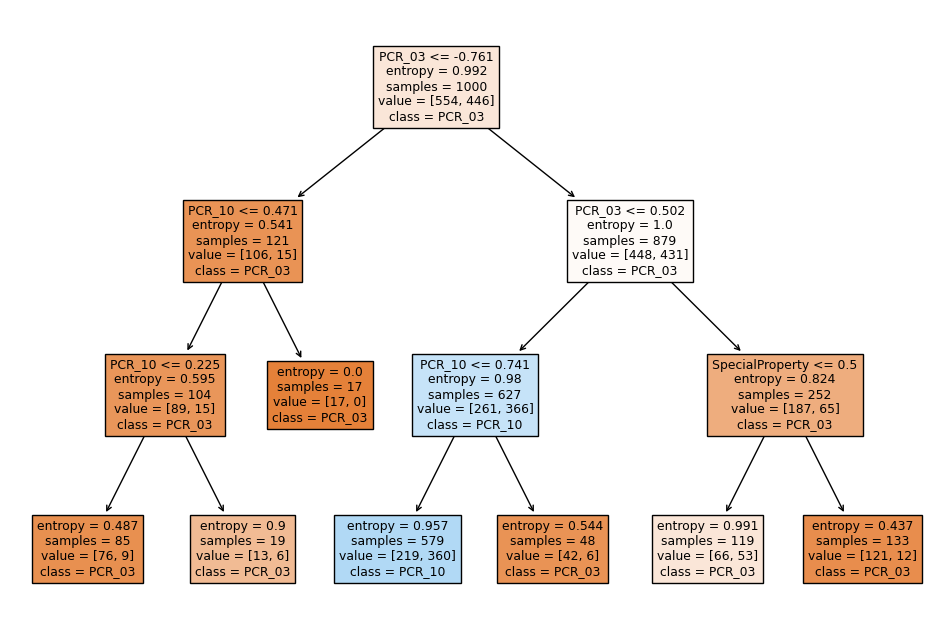

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

#creating training samples and their labels
features = ['PCR_03', 'PCR_10', 'SpecialProperty']
X_train = training_dataset[features]
Y_train = training_dataset['risk']

#create decision tree, train it on data and compute the training accuracy
decisionTree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
decisionTree.fit(X_train, Y_train)
training_accuracy = decisionTree.score(X_train, Y_train)
print(f"Training accuracy: {training_accuracy:.4f}")

#plot the tree
plt.figure(figsize=(12,8))
plot_tree(decisionTree, feature_names=features, class_names=['PCR_03', 'PCR_10', 'SpecialProperty', 'risk'], filled=True)
plt.show()

##Q6

Best training accuracy: 0.8280
Best parameters: {'max_depth': 10, 'min_samples_leaf': 7}


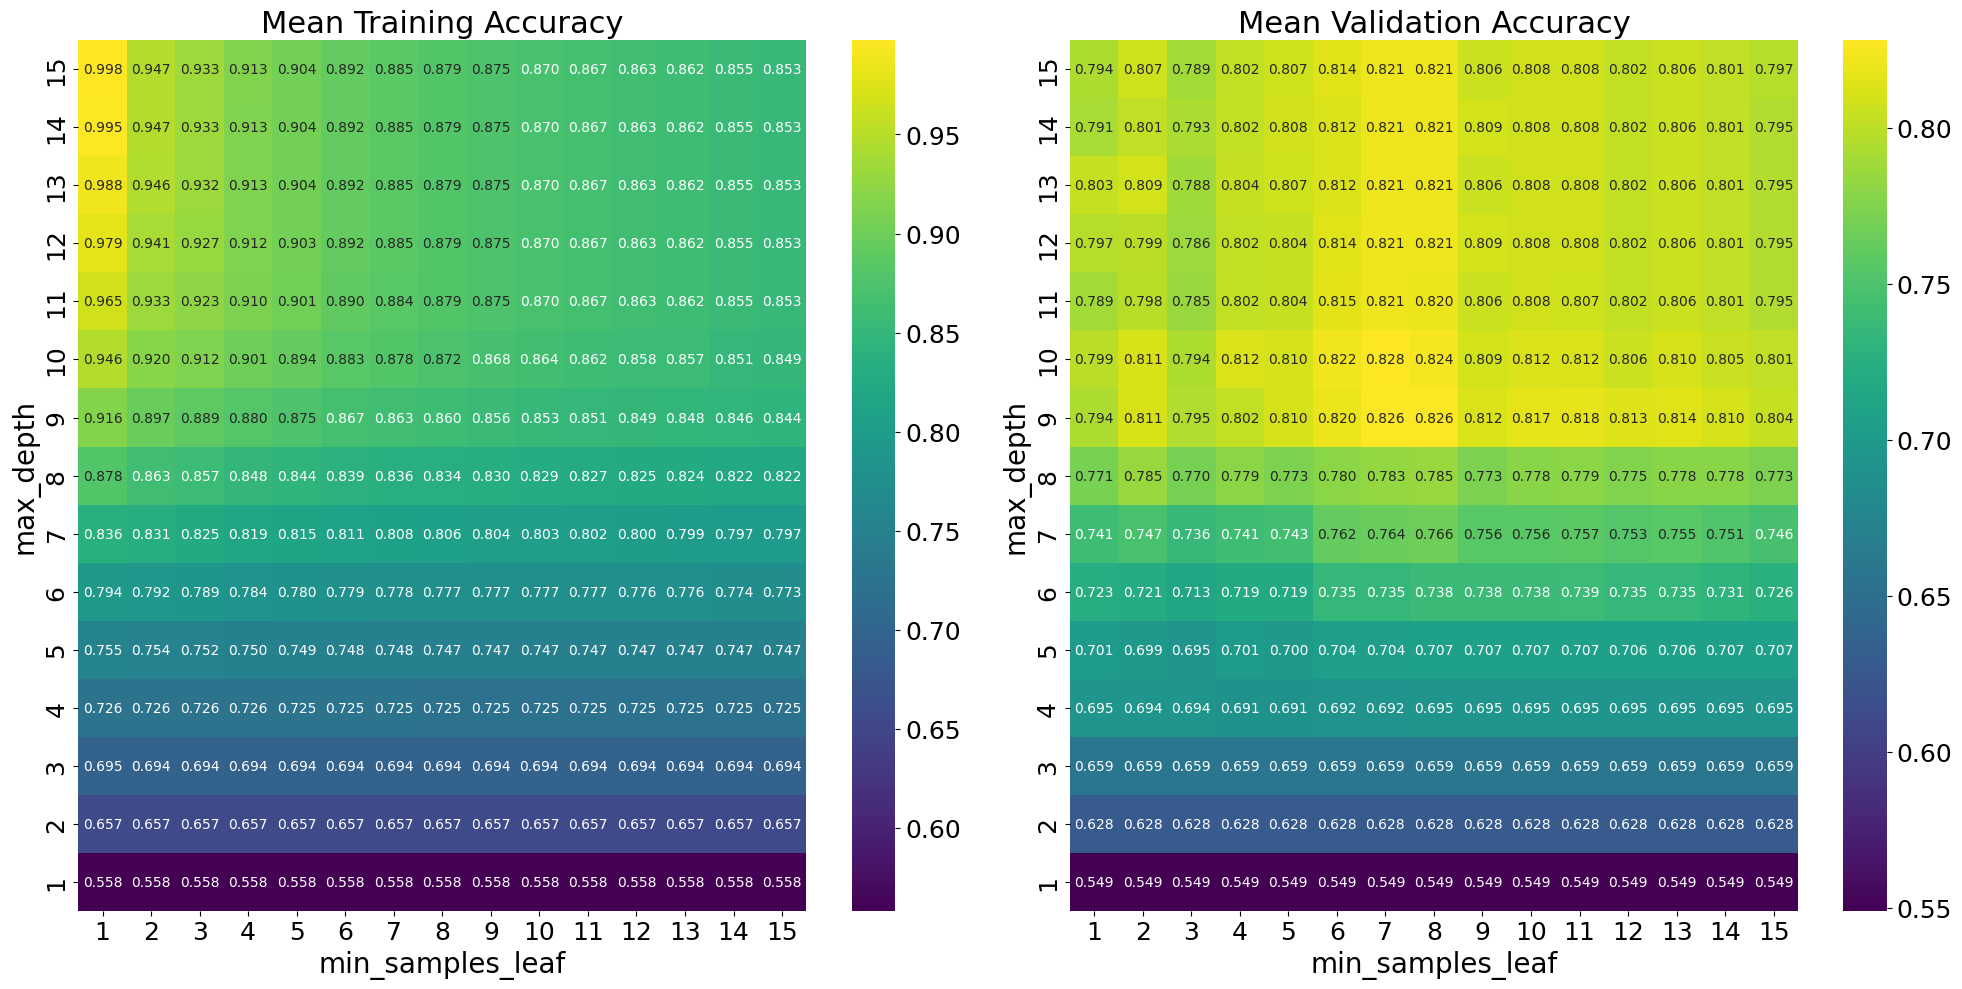

In [10]:
from sklearn.model_selection import GridSearchCV

#perform the Grid searching for finding the best combination of hyperparameters 'max_depth' and 'min_samples_leaf'
decisionTree = DecisionTreeClassifier(criterion='entropy')
gridSearcher = GridSearchCV(estimator=decisionTree, param_grid={'max_depth': range(1, 16), 'min_samples_leaf': range(1,16)}, cv=5, return_train_score=True)
gridSearcher.fit(X_train, Y_train)

#print the best combination and the resulting training accuracy
best_training_accuracy = gridSearcher.best_score_
best_parameters = gridSearcher.best_params_
print(f"Best training accuracy: {best_training_accuracy:.4f}")
print(f"Best parameters: {best_parameters}")

#Extract the cross-validated results for the combinations of the two hyperparameters
results = gridSearcher.cv_results_
mean_train_score = results['mean_train_score'].reshape(15, 15)
mean_test_score = results['mean_test_score'].reshape(15, 15)
mean_train_score_df = pd.DataFrame(mean_train_score, index=range(1, 16), columns=range(1, 16))
mean_test_score_df = pd.DataFrame(mean_test_score, index=range(1, 16), columns=range(1, 16))

# Plot the heatmaps
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
heatmap = sns.heatmap(mean_train_score_df, annot=True, fmt=".3f", cmap='viridis', xticklabels=range(1, 16), yticklabels=range(1, 16))
heatmap.invert_yaxis()
plt.title('Mean Training Accuracy')
plt.xlabel('min_samples_leaf')
plt.ylabel('max_depth')

plt.subplot(1, 2, 2)
heatmap = sns.heatmap(mean_test_score_df, annot=True, fmt=".3f", cmap='viridis', xticklabels=range(1, 16), yticklabels=range(1, 16))
heatmap.invert_yaxis()
plt.title('Mean Validation Accuracy')
plt.xlabel('min_samples_leaf')
plt.ylabel('max_depth')

plt.tight_layout()
plt.show()

##Q8

In [11]:
#creating training and testing samples and their labels
features = ['PCR_03', 'PCR_10', 'SpecialProperty']
X_train = training_dataset[features]
Y_train = training_dataset['risk']
X_test = test_dataset[features]
Y_test = test_dataset['risk']

#create decision tree, train it on data, test it and compute the test accuracy
decisionTree = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=7)
decisionTree.fit(X_train, Y_train)
test_accuracy = decisionTree.score(X_test, Y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

Test accuracy: 0.8280


##Implementation of the loss and its gradient

In [12]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

class SoftSVM(BaseEstimator, ClassifierMixin):
    """
    Custom C-Support Vector Classification.
    """
    def __init__(self, C: float, lr: float = 1e-5, batch_size = 32):
        """
        Initialize an instance of this class.
        ** Do not edit this method **

        :param C: inverse strength of regularization. Must be strictly positive.
        :param lr: the SGD learning rate (step size)
        """
        self.C = C
        self.lr = lr
        self.batch_size = batch_size
        self.w = None
        self.b = 0.0

    # Initialize a random weight vector
    def init_solution(self, n_features: int):
        """
        Randomize an initial solution (weight vector)
        ** Do not edit this method **

        :param n_features:
        """
        self.w = np.random.randn(n_features)
        self.b = 0.0

    @staticmethod
    def loss(w, b: float, C: float, X, y):
        """
        Compute the SVM objective loss.

        :param w: weight vector for linear classification; array of shape (n_features,)
        :param b: bias scalar for linear classification
        :param C: inverse strength of regularization. Must be strictly positive.
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: the Soft SVM objective loss (float scalar)
        """

        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        if isinstance(y, pd.Series):
            y = y.to_numpy()

        margins = (X.dot(w) + b).reshape(-1, 1)
        hinge_inputs = np.multiply(margins, y.reshape(-1, 1))

        norm = np.linalg.norm(w)

        # Calculate the hinge loss
        hinge_loss = np.maximum(0, 1 - hinge_inputs)
        # Calculate the regularization term
        regularization = norm ** 2
        # Calculate the total loss
        loss = regularization + C * np.sum(hinge_loss)

        return loss

    @staticmethod
    def subgradient(w, b: float, C: float, X, y):
        """
        Compute the (analytical) SVM objective sub-gradient.

        :param w: weight vector for linear classification; array of shape (n_features,)
        :param b: bias scalar for linear classification
        :param C: inverse strength of regularization. Must be strictly positive.
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: a tuple with (the gradient of the weights, the gradient of the bias)
        """
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        if isinstance(y, pd.Series):
            y = y.to_numpy()


        # Calculate the margins
        margins = (X.dot(w) + b).reshape(-1, 1)
        # Calculate the hinge function inputs
        hinge_inputs = np.multiply(margins, y.reshape(-1, 1))

        # Apply the hinge function
        f_hinge = np.where(hinge_inputs < 1, -1, 0)

        # Compute the gradient with respect to w
        g_w = 2 * w + C * np.sum(f_hinge * y.reshape(-1, 1) * X, axis=0)

        # Compute the gradient with respect to b
        g_b = C * np.sum(f_hinge * y)

        return g_w, g_b


    def fit_with_logs(self, X, y, max_iter: int = 2000, keep_losses: bool = True):
        """
        Fit the model according to the given training data.

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets (+1 and -1); array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        :param keep_losses:
        :return: the training losses and accuracies during training
        """
        # Initialize learned parameters
        self.init_solution(X.shape[1])

        losses = []
        accuracies = []

        if keep_losses:
            losses.append(self.loss(self.w, self.b, self.C, X, y))
            accuracies.append(self.score(X, y))

        permutation = np.random.permutation(len(y))
        X = X[permutation, :]
        y = y[permutation]

        # Iterate over batches
        for iter in range(0, max_iter):
            start_idx = (iter * self.batch_size) % X.shape[0]
            end_idx = min(X.shape[0], start_idx + self.batch_size)
            batch_X = X[start_idx:end_idx, :]
            batch_y = y[start_idx:end_idx]

            # TODO: Compute the (sub)gradient of the current *batch*
            g_w, g_b = self.subgradient(self.w, self.b, self.C, batch_X, batch_y)

            # Perform a (sub)gradient step
            # TODO: update the learned parameters correctly
            self.w = self.w - self.lr * g_w
            self.b = self.b - self.lr * g_b

            if keep_losses:
                losses.append(self.loss(self.w, self.b, self.C, X, y))
                accuracies.append(self.score(X, y))

        return losses, accuracies

    def fit(self, X, y, max_iter: int = 2000):
        """
        Fit the model according to the given training data.
        ** Do not edit this method **

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets (+1 and -1); array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        """
        self.fit_with_logs(X, y, max_iter=max_iter, keep_losses=False)

        return self

    def predict(self, X):
        """
        Perform classification on samples in X.

        :param X: samples for prediction; array of shape (n_samples, n_features)
        :return: Predicted class labels for samples in X; array of shape (n_samples,)
                 NOTE: the labels must be either +1 or -1
        """
        # TODO: compute the predicted labels (+1 or -1)
        X_dot_w = np.dot(X, self.w)
        y_pred = np.sign(X_dot_w + self.b)

        return y_pred


##Verifying your implementation: Numerical vs. analytical gradients

In [13]:
def numerical_subgradient(w, b, C, X, y, delta=1e-4):
    w_ = w.copy()
    g_w = np.zeros_like(w_)
    orig_objective = SoftSVM.loss(w_, b, C, X, y)
    for i in range(g_w.shape[0]):
        w_[i] += delta
        perturbed_objective = SoftSVM.loss(w_, b, C, X, y)
        w_[i] -= delta
        g_w[i] = (perturbed_objective - orig_objective) / delta

    g_b = (SoftSVM.loss(w_, b + delta, C, X, y) - orig_objective) / delta
    return g_w, g_b



def compare_gradients(X, y, deltas, C=1, REPEATS=100, figsize=(10, 6)):
    residual_means = []

    for delta in deltas:
        residuals = []

        for _ in range(REPEATS):
            # Randomize vectors in which the gradient is computed
            w = np.random.randn(X.shape[1])
            b = np.random.randn(1)

            # Compute the two types of gradients
            analytic_grad = SoftSVM.subgradient(w, b, C, X, y)[0]
            numeric_grad = numerical_subgradient(w, b, C, X, y, delta=delta)[0]

            residual = np.linalg.norm(numeric_grad - analytic_grad)
            residuals.append(residual)

        residual_means.append(np.mean(residuals))

    plt.figure(figsize=figsize)
    plt.title('Residuals of analytical and numerical gradients', fontsize=22)
    plt.plot(deltas, residual_means, linewidth=3)
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('$\delta$', fontsize=18)
    plt.ylabel(r'$\left\Vert \nabla_{w}p_{C}\left(w,b\right) - u_{\delta} \left(w,b\right)\right\Vert$', fontsize=18)

    plt.grid(alpha=0.5)
    plt.show()


##Q9

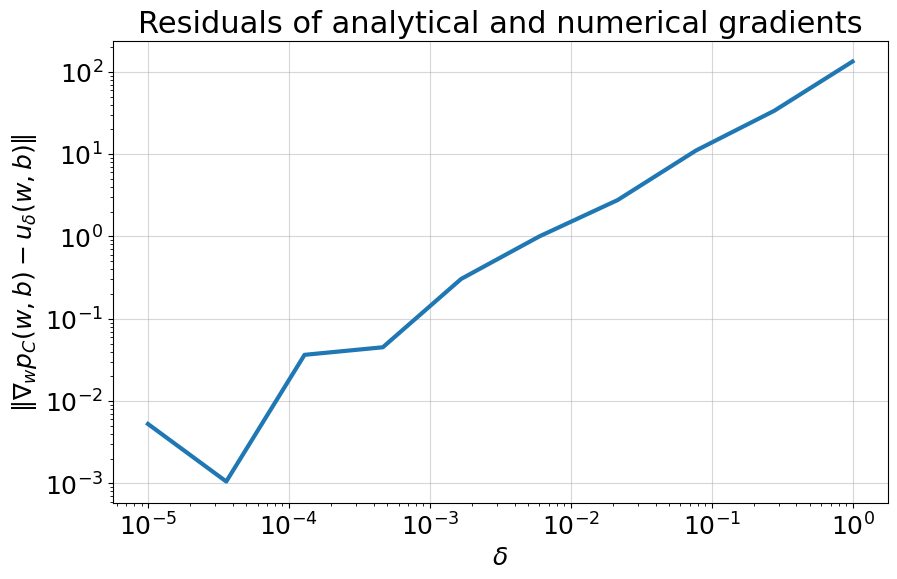

In [14]:
#creates training samples and their labels
features = ['PCR_04', 'PCR_09']
X_train = training_dataset[features]
Y_train = training_dataset['spread']

#plot that compares the numerical gradients to the analytic gradients
compare_gradients(X_train, Y_train, deltas=np.logspace(-5, 0, 10))

##Using a feature mapping




max accuracy and min loss for lr = 1e-11

max accuracy: 0.527
max accuracy iteration: 3188

min loss: 135962642.458
min loss iteration: 5000


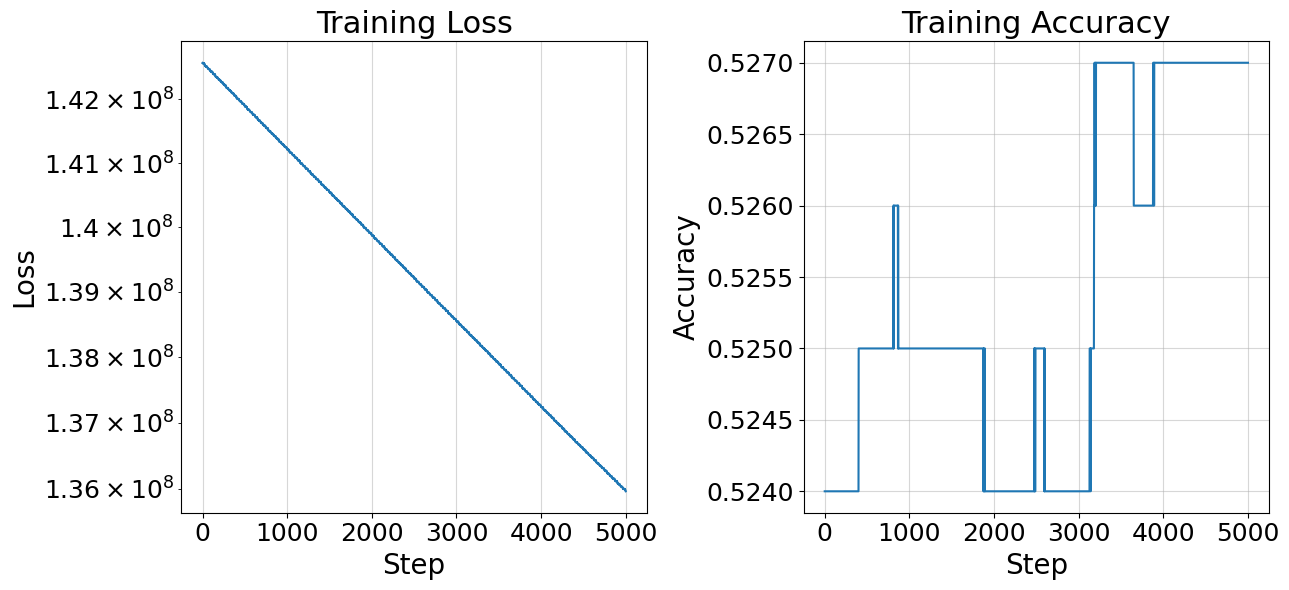



max accuracy and min loss for lr = 1e-09

max accuracy: 0.593
max accuracy iteration: 4991

min loss: 81601976.827
min loss iteration: 4999


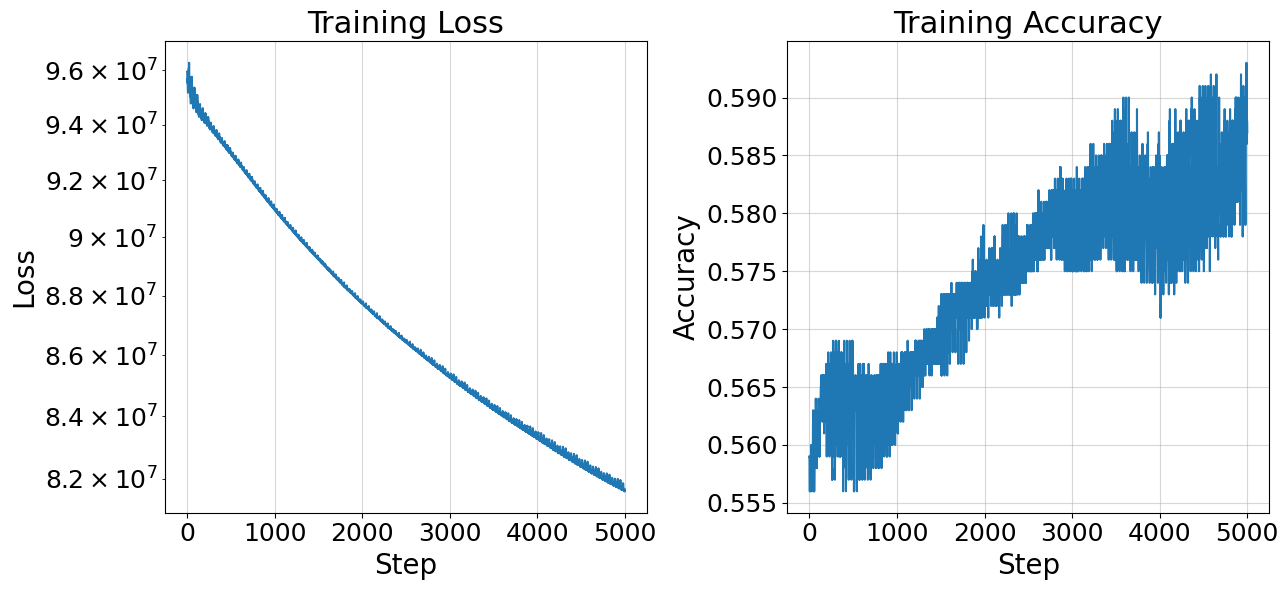



max accuracy and min loss for lr = 1e-07

max accuracy: 0.666
max accuracy iteration: 3451

min loss: 78912272.209
min loss iteration: 328


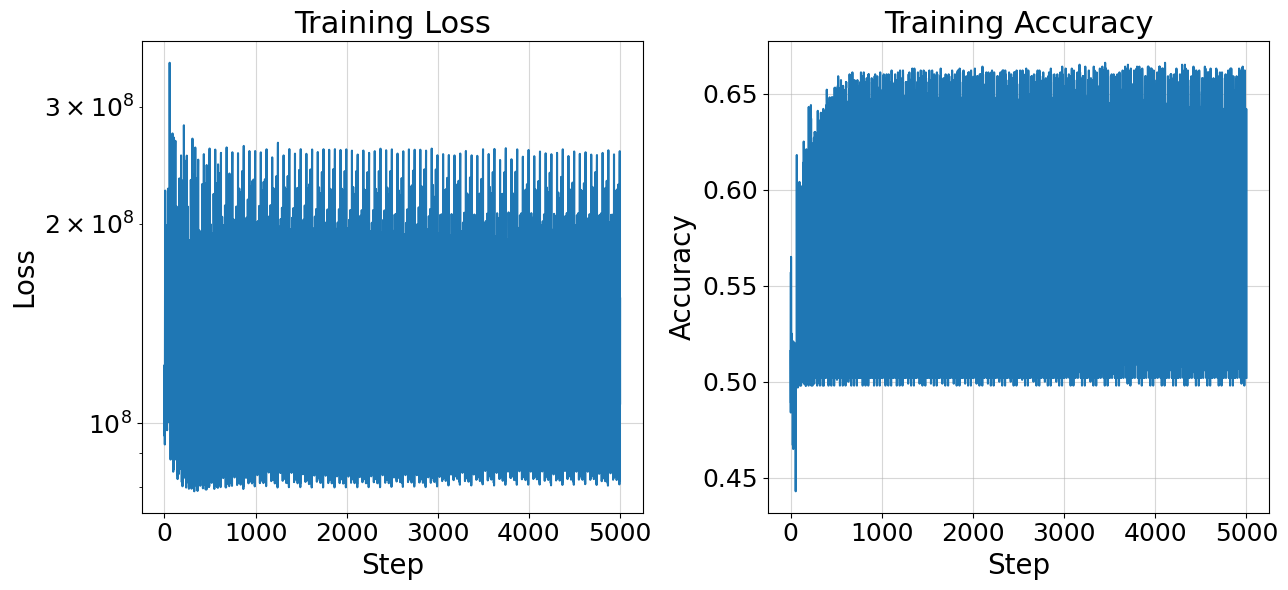



max accuracy and min loss for lr = 1e-05

max accuracy: 0.653
max accuracy iteration: 2182

min loss: 203454696.261
min loss iteration: 0


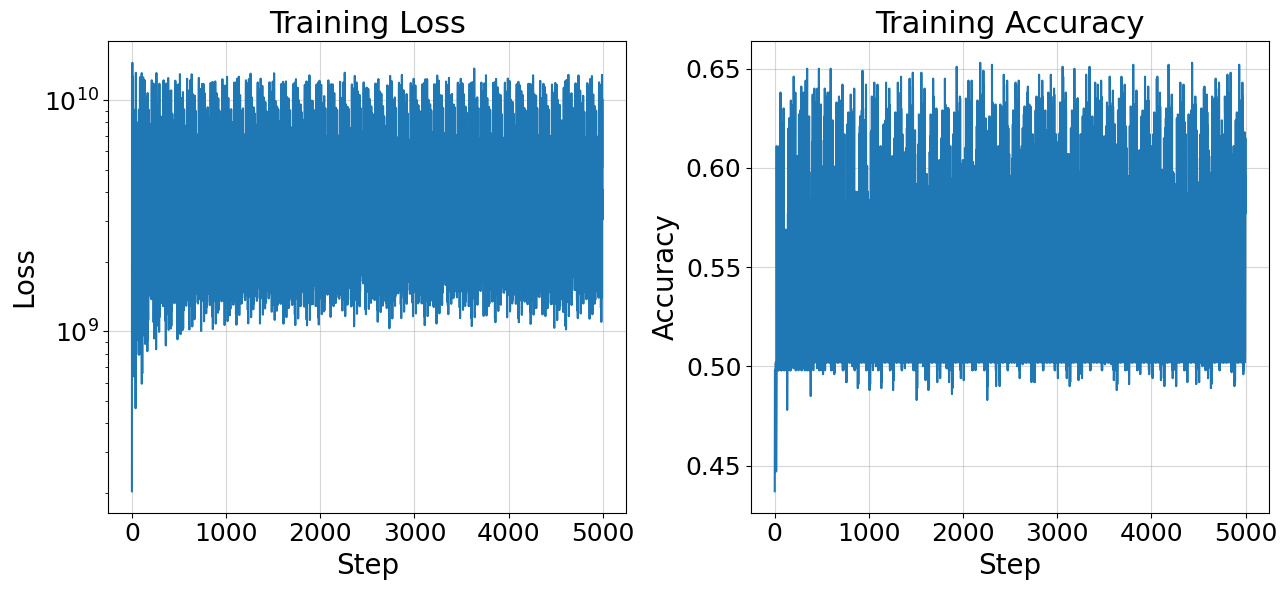



max accuracy and min loss for lr = 0.001

max accuracy: 0.656
max accuracy iteration: 66

min loss: 126705278.306
min loss iteration: 0


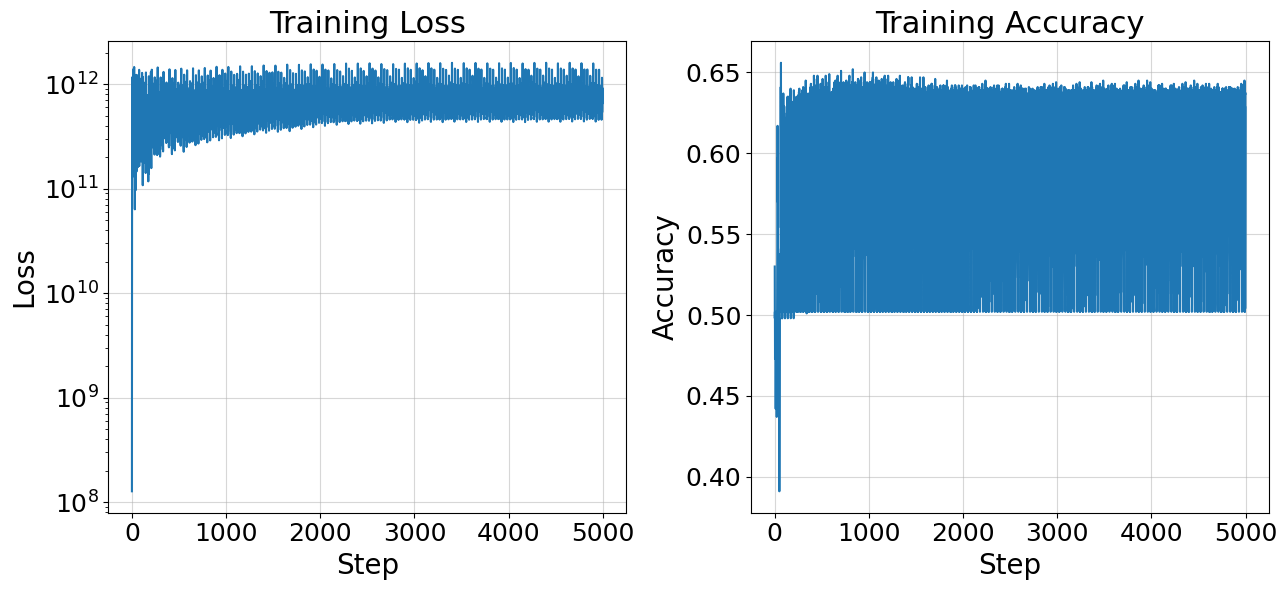

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

def SGD(lr):
  C=1e5
  clf = SoftSVM(C=C, lr=lr)
  X_train_poly = PolynomialFeatures(degree=3,).fit_transform(X_train)
  X_train_poly = MinMaxScaler(feature_range=(-1,1)).fit_transform(X_train_poly)
  losses, accuracies = clf.fit_with_logs(X_train_poly, Y_train, max_iter=5000)
  print("\n\nmax accuracy and min loss for lr = "+str(lr))
  print('\nmax accuracy: {}'.format(np.max(accuracies)))
  print('max accuracy iteration: {}'.format(np.argmax(accuracies)))

  print('\nmin loss: {}'.format(np.round(np.min(losses), 3)))
  print('min loss iteration: {}'.format(np.argmin(losses)))
  plt.figure(figsize=(13, 6))
  plt.subplot(121), plt.grid(alpha=0.5), plt.title ("Training Loss")
  plt.semilogy(losses), plt.xlabel("Step"), plt.ylabel("Loss")
  plt.subplot(122), plt.grid(alpha=0.5), plt.title ("Training Accuracy")
  plt.plot(accuracies), plt.xlabel("Step"), plt.ylabel("Accuracy")
  plt.tight_layout()
  plt.show()


lr_arr =  np.logspace(-11, -3, 5)
for lr in lr_arr:
  SGD(lr)

##Q11

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


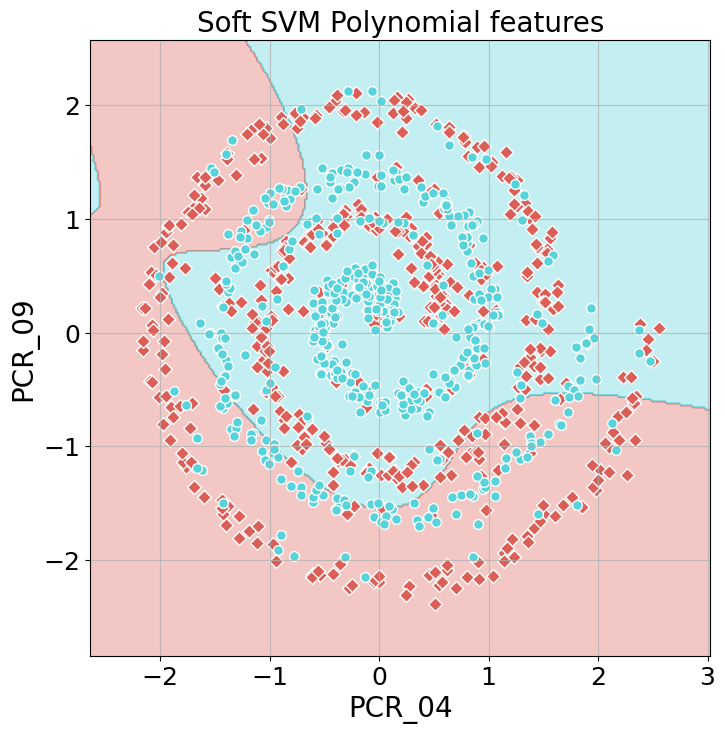

Train Accuracy: 0.538
Test Accuracy: 0.576


In [16]:

from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score

#train, test and get both accuracies
svm_clf = Pipeline([('feature_mapping', PolynomialFeatures(3)),
                    ('scaler', MinMaxScaler()),
                    ('SVM', SoftSVM(C=1e5, lr=1e-7))])
svm_clf.fit(X_train, Y_train, SVM__max_iter=4000)

X_test = test_dataset[['PCR_04','PCR_09']]
Y_test = test_dataset['spread']

train_predictions = svm_clf.predict(X_train)
test_predictions = svm_clf.predict(X_test)

train_accuracy = accuracy_score(Y_train, train_predictions)
test_accuracy = accuracy_score(Y_test, test_predictions)


visualize_clf(svm_clf, X_train, Y_train, 'Soft SVM Polynomial features', xlabel='PCR_04', ylabel='PCR_09')

# Print train and test accuracy
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


##Q14

Train accuracy: 0.5020
Test accuracy: 0.4920


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


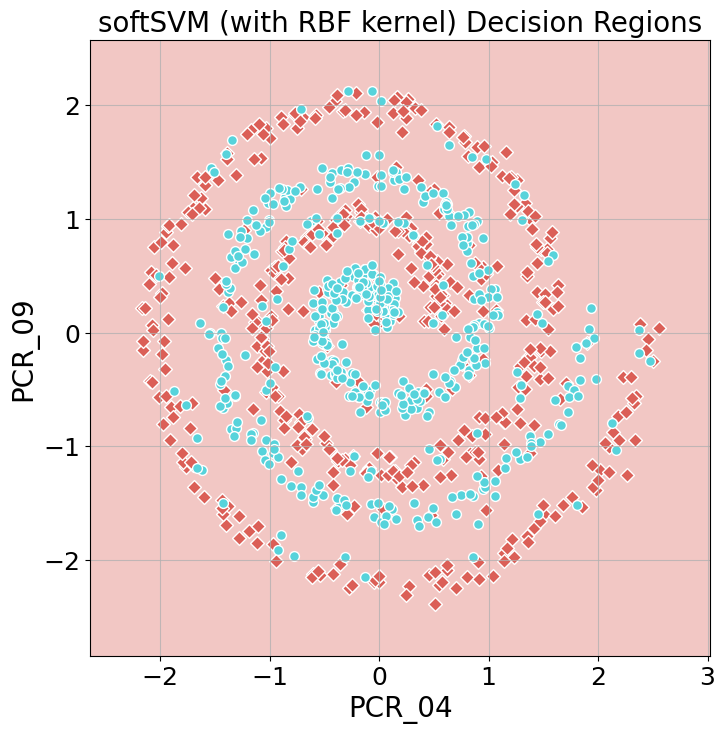

In [17]:
from sklearn.svm import SVC

#creating training and testing samples and their labels
features = ['PCR_04', 'PCR_09']
X_train = training_dataset[features]
Y_train = training_dataset['spread']
X_test = test_dataset[features]
Y_test = test_dataset['spread']

#create SVM model, train it on data, test it and compute the train and test accuracies
svc_model = SVC(C=1.0, kernel='rbf', gamma=1e-7)
svc_model.fit(X_train, Y_train)
train_accuracy = svc_model.score(X_train, Y_train)
test_accuracy = svc_model.score(X_test, Y_test)
print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

#plot decision regions
visualize_clf(svc_model, X_train, Y_train, "softSVM (with RBF kernel) Decision Regions", features[0], features[1])

##Q15

Train accuracy: 0.9230
Test accuracy: 0.7520


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


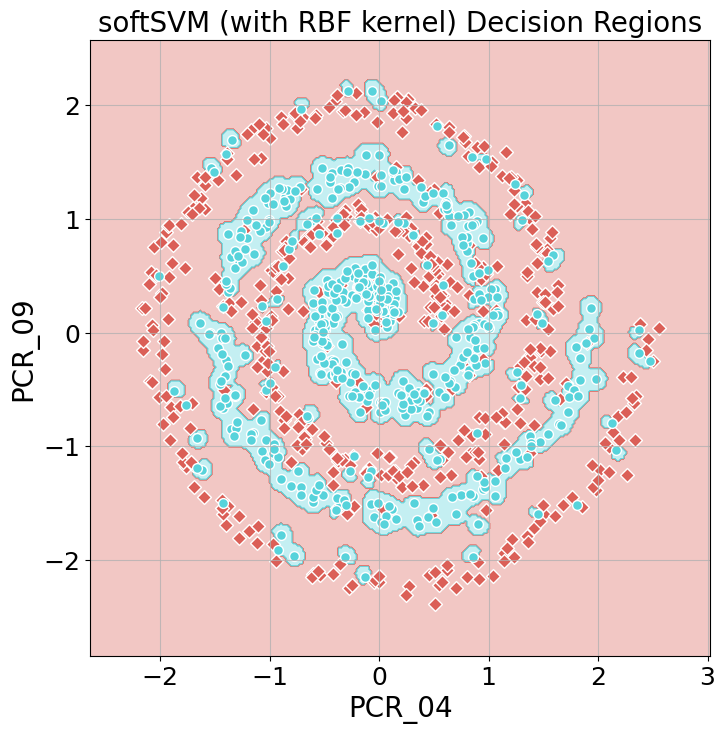

In [18]:
#create SVM model, train it on data, test it and compute the train and test accuracies
svc_model = SVC(C=1.0, kernel='rbf', gamma=200)
svc_model.fit(X_train, Y_train)
train_accuracy = svc_model.score(X_train, Y_train)
test_accuracy = svc_model.score(X_test, Y_test)
print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

#plot decision regions
visualize_clf(svc_model, X_train, Y_train, "softSVM (with RBF kernel) Decision Regions", features[0], features[1])

##Q16

Train accuracy: 0.9980
Test accuracy: 0.5520


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


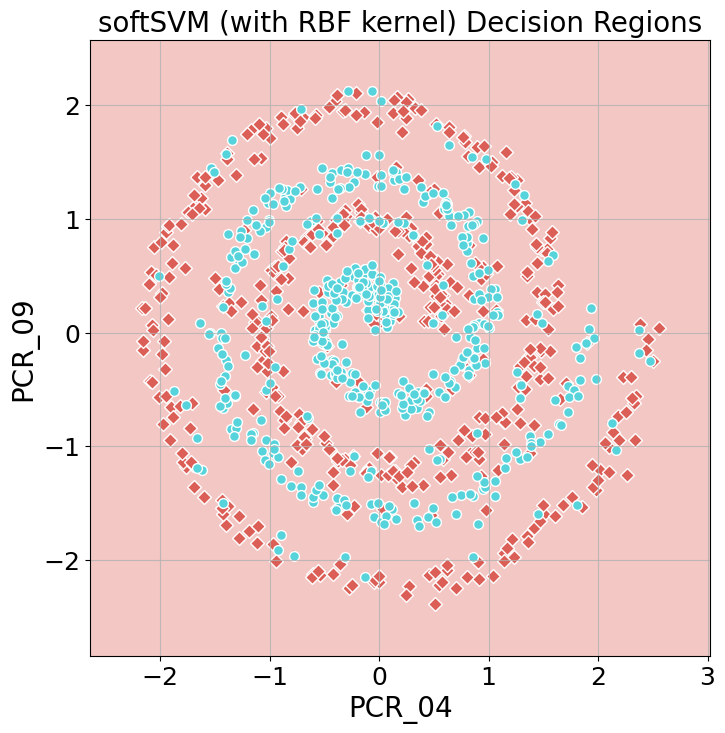

In [19]:
#create SVM model, train it on data, test it and compute the train and test accuracies
svc_model = SVC(C=1.0, kernel='rbf', gamma=5000)
svc_model.fit(X_train, Y_train)
train_accuracy = svc_model.score(X_train, Y_train)
test_accuracy = svc_model.score(X_test, Y_test)
print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

#plot decision regions
visualize_clf(svc_model, X_train, Y_train, "softSVM (with RBF kernel) Decision Regions", features[0], features[1])